In [7]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, train_test_split
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("data.csv", sep=';')
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,TARGET
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
X, y = df.drop(["ID","TARGET"], axis=1), df["TARGET"]
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=8,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=8,stratify=y_temp)
print(X_train.shape, X_val.shape, X_test.shape)

(22950, 23) (4050, 23) (3000, 23)


In [4]:
clf = lgb.LGBMClassifier(random_state=8, importance_type="gain")
folds = KFold(n_splits=5, shuffle=True, random_state=8)

In [5]:
eval_results={}
lgb_callbacks=[lgb.early_stopping(10),lgb.log_evaluation(period=10),lgb.record_evaluation(eval_results)]
params={"learning_rate": [0.01, 0.1],
            "n_estimators": [10, 25, 50],
            "max_depth": [3, 5],
            "reg_lambda": [1, 0.1, 0.01],}

search = GridSearchCV(
            clf, params, cv=folds.split(X_train, y_train), scoring="roc_auc", n_jobs=-1
        )

search.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_val, y_val)], eval_metric="auc",
           callbacks=[])

[1]	valid_0's auc: 0.736756	valid_0's binary_logloss: 0.526405	valid_1's auc: 0.722212	valid_1's binary_logloss: 0.526529
[1]	valid_0's auc: 0.73718	valid_0's binary_logloss: 0.526415	valid_1's auc: 0.721343	valid_1's binary_logloss: 0.52652
[1]	valid_0's auc: 0.736642	valid_0's binary_logloss: 0.526397	valid_1's auc: 0.721034	valid_1's binary_logloss: 0.526526
[2]	valid_0's auc: 0.736756	valid_0's binary_logloss: 0.524469	valid_1's auc: 0.722212	valid_1's binary_logloss: 0.524646
[2]	valid_0's auc: 0.737618	valid_0's binary_logloss: 0.524497	valid_1's auc: 0.723059	valid_1's binary_logloss: 0.524628
[2]	valid_0's auc: 0.736642	valid_0's binary_logloss: 0.524461	valid_1's auc: 0.721034	valid_1's binary_logloss: 0.524647
[1]	valid_0's auc: 0.735249	valid_0's binary_logloss: 0.526398	valid_1's auc: 0.721242	valid_1's binary_logloss: 0.526498
[3]	valid_0's auc: 0.737444	valid_0's binary_logloss: 0.522596	valid_1's auc: 0.72328	valid_1's binary_logloss: 0.522818
[3]	valid_0's auc: 0.748659

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f08f567b4c0>,
             estimator=LGBMClassifier(importance_type='gain', random_state=8),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [10, 25, 50],
                         'reg_lambda': [1, 0.1, 0.01]},
             scoring='roc_auc')

In [ ]:
print("AUC Train: ", roc_auc_score(y_train, search.predict_proba(X_train)[:, 1]))
print("AUC Val: ", roc_auc_score(y_val, search.predict_proba(X_val)[:, 1]))
print("AUC Test: ", roc_auc_score(y_test, search.predict_proba(X_test)[:, 1]))

AUC Train:  0.8195778976608257
AUC Val:  0.7821125314226832
AUC Test:  0.7765452864540354


In [7]:
print("AUC Train: ", roc_auc_score(y_train, search.predict_proba(X_train)[:, 1]))
print("AUC Val: ", roc_auc_score(y_val, search.predict_proba(X_val)[:, 1]))
print("AUC Test: ", roc_auc_score(y_test, search.predict_proba(X_test)[:, 1]))

AUC Train:  0.8206714909982346
AUC Val:  0.7806617093373495
AUC Test:  0.7777312159597293


In [22]:
try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

In [23]:
def render_metric(metric_name):
    ax = lgb.plot_metric(eval_results, metric=metric_name, figsize=(10, 5))
    plt.show()

In [25]:
if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name="auc")
else:
    render_metric("auc")

interactive(children=(Text(value='binary_logloss', description='metric_name'), Output()), _dom_classes=('widge…

In [25]:
search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'reg_lambda': 0.01}

In [20]:
def plot_metric(metric="binary_logloss"):
        ax = lgb.plot_metric(eval_results, metric=metric, figsize=(10, 8))
        ax.set_title(f"{metric} over iterations")
        plt.show()

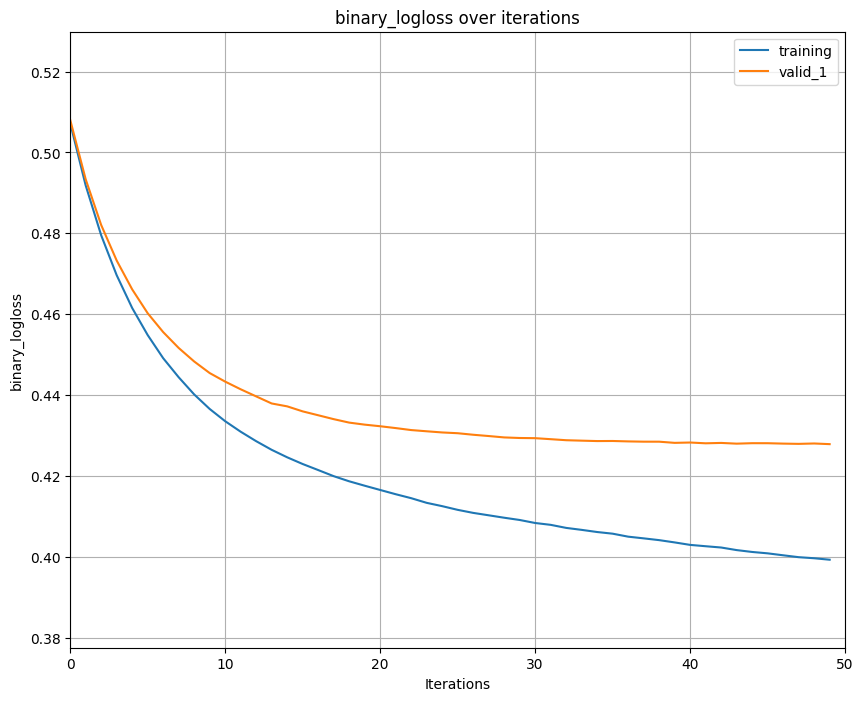

In [21]:
plot_metric()

In [6]:
from LGBMClassifierSearch import LGBMClassifierSearch

In [10]:
busca = LGBMClassifierSearch()

In [17]:
busca.fit(X_train, y_train,eval_set=[(X_train,y_train),(X_val, y_val)], eval_metric="auc",
              callbacks=[lgb.early_stopping(10),lgb.log_evaluation(period=10),lgb.record_evaluation(eval_results)])

Training until validation scores don't improve for 10 rounds
Training until validation scores don't improve for 10 rounds
Training until validation scores don't improve for 10 rounds
Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.737688	valid_0's binary_logloss: 0.5108	valid_1's auc: 0.722941	valid_1's binary_logloss: 0.511513
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.737688	valid_0's binary_logloss: 0.5108	valid_1's auc: 0.722941	valid_1's binary_logloss: 0.511513
[10]	valid_0's auc: 0.750835	valid_0's binary_logloss: 0.510896	valid_1's auc: 0.73253	valid_1's binary_logloss: 0.511386
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.750835	valid_0's binary_logloss: 0.510896	valid_1's auc: 0.73253	valid_1's binary_logloss: 0.511386
[10]	valid_0's auc: 0.753454	valid_0's binary_logloss: 0.510811	valid_1's auc: 0.743112	valid_1's binary_logloss: 0.511325
Did not meet early stopping. Best iteration is:
[10

In [23]:
busca.plot_metric()

TypeError: booster must be dict or LGBMModel.